<a href="https://colab.research.google.com/github/chenoa23/NLP/blob/main/Chenoa_Nussberger_Week_3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3 Assignment
```



# Part 2: Programmatically (Logistic Regression for Sentiment Analysis)

Chenoa Nussberger\
Lauren Coba

---



Follow this tutorial:  https://drlee.io/zero-to-hero-in-natural-language-processing-nlp-a-beginners-template-for-text-classification-73839ef3e2e7

AND: create a model with a NEW dataset (Amazon Fine Food Reviews)


---



https://archive.ics.uci.edu/dataset/911/recipe+reviews+and+user+feedback+dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Step 1: Loading and Understanding the Dataset


In [ ]:
# Importing necessary libraries
import pandas as pd

# Loading the dataset
url = "https://raw.githubusercontent.com/fenago/datasets/refs/heads/main/TheSocialDilemma.csv"
df = pd.read_csv(url, encoding='ISO-8859-1')

# Displaying the first few rows of the dataset
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Sentiment
0,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:55:33,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
1,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:53:17,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
2,Varun Tyagi,"Goa, India",Indian | Tech Solution Artist & Hospitality Ex...,2009-09-06 10:36:01,257,204,475,False,2020-09-16 20:51:57,Go watch âThe Social Dilemmaâ on Netflix!\...,NaN,Twitter for iPhone,False,Positive
3,Casey Conway,"Sydney, New South Wales",Head of Diversity & Inclusion @RugbyAU | It's ...,2012-12-28 21:45:06,11782,1033,12219,True,2020-09-16 20:51:46,I watched #TheSocialDilemma last night. Iâm ...,['TheSocialDilemma'],Twitter for iPhone,False,Negative
4,Charlotte Paul,Darlington,Instagram Charlottejyates,2012-05-28 20:43:08,278,387,5850,False,2020-09-16 20:51:11,The problem of me being on my phone most the t...,['TheSocialDilemma'],Twitter for iPhone,False,Positive


In [ ]:
# Handling missing values and converting labels to binary format
df.dropna(subset=['text'], inplace=True)
df['Sentiment'] = df['Sentiment'].map({'Positive': 1, 'Negative': 0, 'Neutral': 0})

# Step 2: Data Preprocessing — The Key to High-Performance Models

In [ ]:
import re

# Cleaning the text data
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
    return text

# Applying the cleaning function to the dataset
df['text'] = df['text'].apply(clean_text)
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Sentiment
0,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:55:33,musicmadmarc socialdilemma netflix facebook im...,NaN,Twitter Web App,False,0
1,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:53:17,musicmadmarc socialdilemma netflix facebook ha...,NaN,Twitter Web App,False,0
2,Varun Tyagi,"Goa, India",Indian | Tech Solution Artist & Hospitality Ex...,2009-09-06 10:36:01,257,204,475,False,2020-09-16 20:51:57,go watch the social dilemma on netflix\n\nits ...,NaN,Twitter for iPhone,False,1
3,Casey Conway,"Sydney, New South Wales",Head of Diversity & Inclusion @RugbyAU | It's ...,2012-12-28 21:45:06,11782,1033,12219,True,2020-09-16 20:51:46,i watched thesocialdilemma last night im scare...,['TheSocialDilemma'],Twitter for iPhone,False,0
4,Charlotte Paul,Darlington,Instagram Charlottejyates,2012-05-28 20:43:08,278,387,5850,False,2020-09-16 20:51:11,the problem of me being on my phone most the t...,['TheSocialDilemma'],Twitter for iPhone,False,1


# Step 3: Text Vectorization with TF-IDF


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')

# Transforming the text data
X_tfidf = tfidf_vectorizer.fit_transform(df['text'])
y = df['Sentiment']

# Step 4: Splitting the Data for Training and Testing


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Step 5: Building and Evaluating Classification Models


## 5.1 Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      2078
           1       0.90      0.82      0.85      1936

    accuracy                           0.87      4014
   macro avg       0.87      0.86      0.86      4014
weighted avg       0.87      0.87      0.87      4014



## 5.2 Support Vector Machine (SVM)


In [ ]:
from sklearn.svm import SVC

# SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred_svm = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      2078
           1       0.91      0.85      0.88      1936

    accuracy                           0.89      4014
   macro avg       0.89      0.89      0.89      4014
weighted avg       0.89      0.89      0.89      4014



## 5.3 XGBoost


In [ ]:
from xgboost import XGBClassifier

# XGBoost Model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      2078
           1       0.90      0.80      0.85      1936

    accuracy                           0.86      4014
   macro avg       0.86      0.86      0.86      4014
weighted avg       0.86      0.86      0.86      4014



# Step 6: Confusion Matrix — Understanding the Results


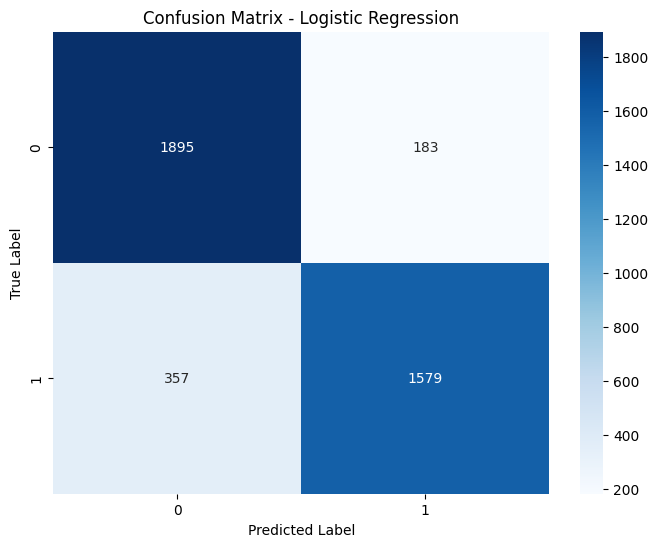

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generating and plotting the confusion matrix for the Logistic Regression model
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Amazon Fine Food Reviews
Description: Contains reviews of fine foods from Amazon, along with ratings and sentiment labels.

Use Case: Predict whether a review is positive or negative based on the text content.

Columns: Text, Score (can be converted to binary sentiment)

Why It’s Suitable: Offers opportunities to work with longer text reviews and create a binary sentiment classification task by converting ratings into positive (4–5) and negative (1–2) labels.

Link: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

In [ ]:
# Loading the dataset
url = '/content/drive/MyDrive/CAI2300C/Week 4/Reviews.csv'
df = pd.read_csv(url, encoding ='ISO-8859-1')

# Display the first few rows
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
# Drop unwanted columns
df.drop(['ProductId', 'ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time'], inplace=True, axis=1)

# Verify if columns were dropped
df.head()

,Id,UserId,Score,Summary,Text
0,1,A3SGXH7AUHU8GW,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,A1D87F6ZCVE5NK,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,ABXLMWJIXXAIN,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,A395BORC6FGVXV,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,A1UQRSCLF8GW1T,5,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
# Convert ratings to binary sentiment labels:
df['Sentiment'] = df['Score'].apply(lambda x: 1 if x > 3 else 0)

df.head()

,Id,UserId,Score,Summary,Text,Sentiment
0,1,A3SGXH7AUHU8GW,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,A1D87F6ZCVE5NK,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,ABXLMWJIXXAIN,4,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,A395BORC6FGVXV,2,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,A1UQRSCLF8GW1T,5,Great taffy,Great taffy at a great price. There was a wid...,1


In [ ]:
# Cleaning the text data
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
    return text

# Applying the cleaning function to the dataset
df['Text'] = df['Text'].apply(clean_text)
df.head()

,Id,UserId,Score,Summary,Text,Sentiment
0,1,A3SGXH7AUHU8GW,5,Good Quality Dog Food,i have bought several of the vitality canned d...,1
1,2,A1D87F6ZCVE5NK,1,Not as Advertised,product arrived labeled as jumbo salted peanut...,0
2,3,ABXLMWJIXXAIN,4,"""Delight"" says it all",this is a confection that has been around a fe...,1
3,4,A395BORC6FGVXV,2,Cough Medicine,if you are looking for the secret ingredient i...,0
4,5,A1UQRSCLF8GW1T,5,Great taffy,great taffy at a great price there was a wide...,1


In [ ]:
# Initializing the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')

# Transforming the text data
X_tfidf = tfidf_vectorizer.fit_transform(df['Text'])
y = df['Sentiment']

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

For additional practice I added the SVM model, xgboost, and confusion matrix.

In [ ]:
# SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred_svm = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

In [ ]:
from xgboost import XGBClassifier

# XGBoost Model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generating and plotting the confusion matrix for the Logistic Regression model
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()